lien description dataset: https://www.kaggle.com/olistbr/brazilian-ecommerce

In [1]:
import os
from IPython.display import display
import re

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

from sklearn.preprocessing import StandardScaler
from dateutil.relativedelta import relativedelta

pd.set_option('display.max_columns', 100)

%reload_ext autoreload
%autoreload 2

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
datafile_names = os.listdir("C:/Users/fayssal.elanbi/Documents/Projet 3/data")
datafile_names=['data/'+name for name in datafile_names]
datafile_names

['data/olist_customers_dataset.csv',
 'data/olist_geolocation_dataset.csv',
 'data/olist_orders_dataset.csv',
 'data/olist_order_items_dataset.csv',
 'data/olist_order_payments_dataset.csv',
 'data/olist_order_reviews_dataset.csv',
 'data/olist_products_dataset.csv',
 'data/olist_sellers_dataset.csv',
 'data/product_category_name_translation.csv']

In [4]:
for name in datafile_names:
    if('olist' in name):
        print('dataset name: ',re.search('olist_(.*)_dataset', name).group(1))
    else:
        print('dataset name: ',re.search('data/(.*).csv', name).group(1))
    display(pd.read_csv(name))

dataset name:  customers


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


dataset name:  geolocation


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
...,...,...,...,...,...
1000158,99950,-28.068639,-52.010705,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS
1000161,99980,-28.388932,-51.846871,david canabarro,RS


dataset name:  orders


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


dataset name:  order_items


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


dataset name:  order_payments


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


dataset name:  order_reviews


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99995,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99996,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99997,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13
99998,be360f18f5df1e0541061c87021e6d93,f8bd3f2000c28c5342fedeb5e50f2e75,1,NaN,Solicitei a compra de uma capa de retrovisor c...,2017-12-15 00:00:00,2017-12-16 01:29:43


dataset name:  products


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


dataset name:  sellers


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
...,...,...,...,...
3090,98dddbc4601dd4443ca174359b237166,87111,sarandi,PR
3091,f8201cab383e484733266d1906e2fdfa,88137,palhoca,SC
3092,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP
3093,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS


dataset name:  product_category_name_translation


,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
...,...,...
66,flores,flowers
67,artes_e_artesanato,arts_and_craftmanship
68,fraldas_higiene,diapers_and_hygiene
69,fashion_roupa_infanto_juvenil,fashion_childrens_clothes


In [5]:
customers = pd.read_csv('data/olist_customers_dataset.csv')
geolocation = pd.read_csv('data/olist_geolocation_dataset.csv')
order_items = pd.read_csv('data/olist_order_items_dataset.csv')
order_payments = pd.read_csv('data/olist_order_payments_dataset.csv')
order_reviews = pd.read_csv('data/olist_order_reviews_dataset.csv')
orders = pd.read_csv('data/olist_orders_dataset.csv')
products_ = pd.read_csv('data/olist_products_dataset.csv')
sellers = pd.read_csv('data/olist_sellers_dataset.csv')
translation = pd.read_csv('data/product_category_name_translation.csv')

In [6]:
# dictionnaire regroupant plusieurs sous-catégories en une catgéorie principale
product_categories_dict = {
    'construction_tools_construction': 'construction',
    'construction_tools_lights': 'construction',
    'construction_tools_safety': 'construction',
    'costruction_tools_garden': 'construction',
    'costruction_tools_tools': 'construction',
    'garden_tools': 'construction',
    'home_construction': 'construction',

    'fashio_female_clothing': 'fashion',
    'fashion_bags_accessories': 'fashion',
    'fashion_childrens_clothes': 'fashion',
    'fashion_male_clothing': 'fashion',
    'fashion_shoes': 'fashion',
    'fashion_sport': 'fashion',
    'fashion_underwear_beach': 'fashion',

    'furniture_bedroom': 'furniture',
    'furniture_decor': 'furniture',
    'furniture_living_room': 'furniture',
    'furniture_mattress_and_upholstery': 'furniture',
    'bed_bath_table': 'furniture',
    'kitchen_dining_laundry_garden_furniture': 'furniture',
    'office_furniture': 'furniture',

    'home_appliances': 'home',
    'home_appliances_2': 'home',
    'home_comfort_2': 'home',
    'home_confort': 'home',
    'air_conditioning': 'home',
    'housewares': 'home',
    'art': 'home',
    'arts_and_craftmanship': 'home',
    'flowers': 'home',
    'cool_stuff': 'home',

    'drinks': 'food_drink',
    'food': 'food_drink',
    'food_drink': 'food_drink',
    'la_cuisine': 'food_drink',

    'electronics': 'electronics',
    'audio': 'electronics',
    'tablets_printing_image': 'electronics',
    'telephony': 'electronics',
    'fixed_telephony': 'electronics',
    'small_appliances': 'electronics',
    'small_appliances_home_oven_and_coffee': 'electronics',
    'computers_accessories': 'electronics',
    'computers': 'electronics',

    'sports_leisure': 'sports_leisure',
    'consoles_games': 'sports_leisure',
    'musical_instruments': 'sports_leisure',
    'toys': 'sports_leisure',
    'cine_photo': 'sports_leisure',
    'dvds_blu_ray': 'sports_leisure',
    'cds_dvds_musicals': 'sports_leisure',
    'music': 'sports_leisure',
    'books_general_interest': 'sports_leisure',
    'books_imported': 'sports_leisure',
    'books_technical': 'sports_leisure',

    'health_beauty': 'health_beauty',
    'perfumery': 'health_beauty',
    'diapers_and_hygiene': 'health_beauty',
    'baby': 'health_beauty',

    'christmas_supplies': 'supplies',
    'stationery': 'supplies',
    'party_supplies': 'supplies',
    'auto': 'supplies',
    'luggage_accessories': 'supplies',

    'watches_gifts': 'gifts',

    'agro_industry_and_commerce': 'misc',
    'industry_commerce_and_business': 'misc',
    'security_and_services': 'misc',
    'signaling_and_security': 'misc',
    'market_place': 'misc',
    'pet_shop': 'misc',
}

ren = {'product_category_name_english' : 'category'}
translation.rename(inplace = True, columns = ren)
translation['category']=translation['category'].map(product_categories_dict)

products = products_[['product_id', 'product_category_name']].copy()
products = products.set_index('product_category_name').join(translation.set_index('product_category_name')).reset_index(drop = True)
products.category = products.category.fillna('unknown')

order_items['price_freight_sum'] = order_items.price + order_items.freight_value

In [7]:
products.isna().sum()

product_id    0
category      0
dtype: int64

In [8]:
order_payments.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [9]:
order_items.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
price_freight_sum      0
dtype: int64

In [10]:
orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [11]:
order_reviews.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       88285
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [86]:
histo = order_items.copy()
histo = histo.set_index('product_id').join(products.set_index('product_id'))
histo.reset_index(inplace = True)
histo = histo.set_index('order_id').join(orders.set_index('order_id'))
histo = histo.join(order_payments.set_index('order_id'))
histo = histo.join(order_reviews.set_index('order_id')).reset_index()
histo = histo.set_index('customer_id').join(customers.set_index('customer_id')).reset_index(drop = True)
histo.rename(columns = {'customer_unique_id' : 'customer_id'}, inplace = True)

# Traitement des valeurs manquantes

In [98]:
histo.order_status.value_counts()

delivered    115731
Name: order_status, dtype: int64

In [99]:
# On ne garde que les commandes déliverées
histo = histo[histo.order_status == 'delivered']

In [100]:
histo.isna().sum()

order_id                              0
product_id                            0
order_item_id                         0
seller_id                             0
shipping_limit_date                   0
price                                 0
freight_value                         0
price_freight_sum                     0
category                              0
order_status                          0
order_purchase_timestamp              0
order_approved_at                    15
order_delivered_carrier_date          2
order_delivered_customer_date         8
order_estimated_delivery_date         0
payment_sequential                    3
payment_type                          3
payment_installments                  3
payment_value                         3
review_id                             0
review_score                          0
review_comment_title             101980
review_comment_message            66767
review_creation_date                  0
review_answer_timestamp               0


<Figure size 1080x360 with 0 Axes>

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

Text(0.5, 1.0, 'Pourcentage de NaN pour les colonnes en contenant')

<AxesSubplot:title={'center':'Pourcentage de NaN pour les colonnes en contenant'}, xlabel='column', ylabel='pourcentage_nan'>

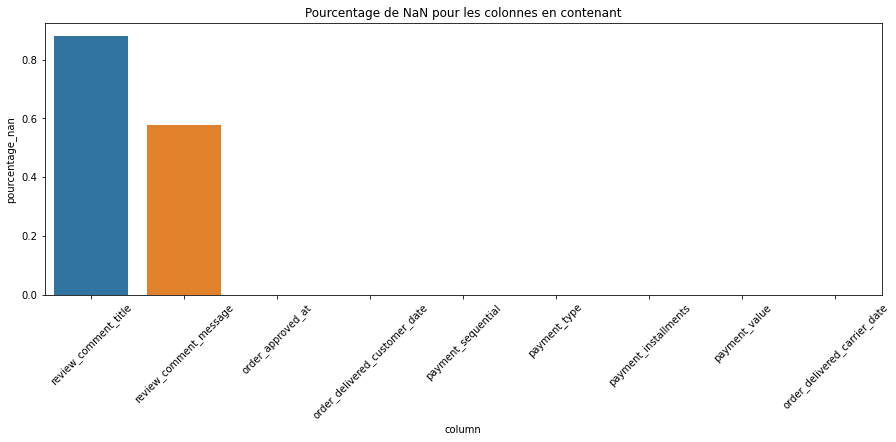

In [101]:
df_tmp = (histo.isna().sum()/histo.shape[0]).to_frame().reset_index().copy()
df_tmp.rename(columns={'index' : 'column',
                       0 : 'pourcentage_nan'},inplace = True)
df_tmp = df_tmp[df_tmp.pourcentage_nan > 0]
df_tmp.sort_values(by=['pourcentage_nan'],ascending=False,inplace=True)

plt.figure(figsize=(15,5))
plt.xticks(rotation=45)
plt.title('Pourcentage de NaN pour les colonnes en contenant')
sns.barplot(data=df_tmp,
              x='column',
              y='pourcentage_nan')
plt.savefig('resultats/stats_nan_cols.png')
plt.show()

In [102]:
# On remplace les valeurs manquantes des paiements approuvés
# par la date de validation de la commande par le client

def fill_order(row):
    if row['order_approved_at']==row['order_approved_at']: # check != NaN
        return row['order_approved_at']
    return row['order_purchase_timestamp']
        
histo.order_approved_at = histo.apply(fill_order, axis=1)

In [103]:
histo.drop(columns = ['review_comment_title','review_comment_message'], inplace=True)

In [104]:
# stats nan en pourcentage
100 * histo.isna().sum().sum()/histo.shape[0]

0.019009599847923202

In [105]:
# On supprime les quelques valeurs manquantes qui ne représente qu'au plus 2%
# du dataset
histo.dropna(inplace=True)

In [106]:
to_dt = ['order_purchase_timestamp','order_approved_at', 'order_delivered_carrier_date',
        'order_delivered_customer_date', 'order_estimated_delivery_date']
for col in to_dt:
    histo[col] = pd.to_datetime(histo[col])

In [107]:
histo['day_name']=histo.order_purchase_timestamp.dt.day_name()
histo['hour'] = histo['order_purchase_timestamp'].dt.hour

In [108]:
df = histo[['order_id','order_item_id','payment_type','payment_sequential','payment_value','price_freight_sum']].copy()

histo[histo.order_id == 'fedcd9f7ccdc8cba3a18defedd1a5547'][['order_id','order_item_id','payment_type','payment_sequential','payment_value','price_freight_sum']]

df = df.groupby(['order_id','order_item_id']).agg({
    'payment_sequential' : 'max',
    'price_freight_sum' : 'first'
})    

df.price_freight_sum /= df.payment_sequential
df.rename(columns = {'price_freight_sum':'CA_ligne'}, inplace = True)
df.drop(columns = ['payment_sequential'], inplace = True)
histo = histo.set_index(['order_id','order_item_id']).join(df).reset_index()

df.loc['fedcd9f7ccdc8cba3a18defedd1a5547',:]

,order_id,order_item_id,payment_type,payment_sequential,payment_value,price_freight_sum
9097,fedcd9f7ccdc8cba3a18defedd1a5547,1,voucher,15.0,10.66,102.87
9098,fedcd9f7ccdc8cba3a18defedd1a5547,1,credit_card,1.0,1.67,102.87
9099,fedcd9f7ccdc8cba3a18defedd1a5547,1,voucher,9.0,5.30,102.87
9100,fedcd9f7ccdc8cba3a18defedd1a5547,1,voucher,11.0,8.42,102.87
9101,fedcd9f7ccdc8cba3a18defedd1a5547,1,voucher,8.0,31.43,102.87
9102,fedcd9f7ccdc8cba3a18defedd1a5547,1,voucher,14.0,7.63,102.87
9103,fedcd9f7ccdc8cba3a18defedd1a5547,1,voucher,2.0,7.76,102.87
9104,fedcd9f7ccdc8cba3a18defedd1a5547,1,voucher,13.0,5.84,102.87
9105,fedcd9f7ccdc8cba3a18defedd1a5547,1,voucher,19.0,8.42,102.87
9106,fedcd9f7ccdc8cba3a18defedd1a5547,1,voucher,5.0,9.76,102.87


,CA_ligne
order_item_id,
1,5.414211
2,5.414211


In [109]:
histo.CA_ligne.sum()

15482911.475

<Figure size 1080x360 with 0 Axes>

Text(0.5, 1.0, "Pourcentage de clients par nombre d'achats")

<AxesSubplot:title={'center':"Pourcentage de clients par nombre d'achats"}, xlabel='nb_achats', ylabel='pourcentage_clients'>

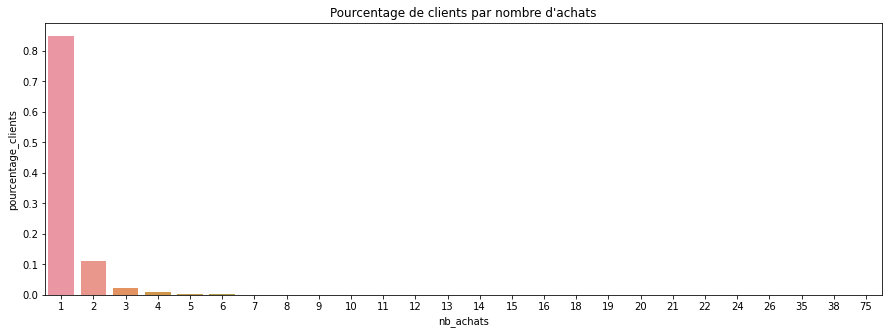

In [110]:
df_tmp=histo.customer_id.value_counts().value_counts(normalize=True).sort_index().to_frame().copy()
df_tmp.reset_index(inplace=True)
df_tmp.rename(columns={'customer_id':'pourcentage_clients',
                       'index':'nb_achats'},inplace=True)
plt.figure(figsize=(15,5))
plt.title('Pourcentage de clients par nombre d\'achats')
sns.barplot(data=df_tmp,
              x='nb_achats',
              y='pourcentage_clients')
plt.savefig('resultats/stats_nb_achats_clients.png')
plt.show()

In [111]:
print(histo.order_purchase_timestamp.min())

2016-10-03 09:44:50


In [112]:
print(histo.order_purchase_timestamp.max())

2018-08-29 15:00:37


In [113]:
len(histo.customer_id.unique())

93348

# Analyses générales

Statistique des catégories

<Figure size 1080x360 with 0 Axes>

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

<AxesSubplot:xlabel='category', ylabel='count'>

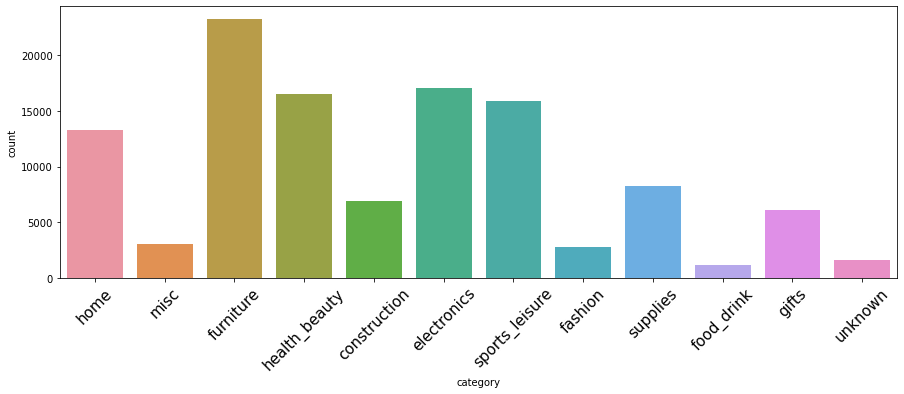

In [124]:
df =  histo[['category']].copy()

plt.figure(figsize = (15,5))
plt.xticks(rotation = 45, fontsize = 15)
sns.countplot(data = df, x = 'category')
plt.savefig('resultats/stats_'+'-'.join(df.columns)+'.png',bbox_inches='tight')
plt.show()

Statistique des délais de livraison

<Figure size 1080x360 with 0 Axes>

Text(0.5, 1.0, 'Distribution des délais de livraison')

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

<AxesSubplot:title={'center':'Distribution des délais de livraison'}, xlabel='delai_livraison', ylabel='count'>

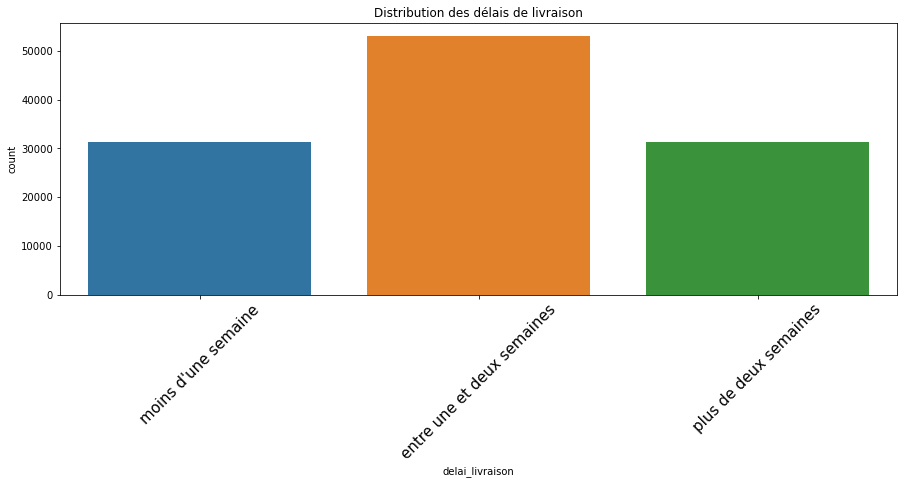

In [125]:
df = histo[['order_purchase_timestamp', 'order_delivered_customer_date']].copy()

df['delai_livraison'] = pd.to_datetime(df.order_delivered_customer_date) - pd.to_datetime(df.order_purchase_timestamp)
df.delai_livraison = df.delai_livraison.astype(str).str.split(' ').str[0]
df.delai_livraison = pd.to_numeric(df.delai_livraison)

def tranche(delai):
    if delai < 7:
        return 'moins d\'une semaine'
    if delai <= 14:
        return 'entre une et deux semaines'
    return 'plus de deux semaines'

df.delai_livraison = df.delai_livraison.apply(lambda delai: tranche(delai))
ords = ['moins d\'une semaine','entre une et deux semaines',
        'plus de deux semaines']

plt.figure(figsize = (15,5))
plt.title('Distribution des délais de livraison')
plt.xticks(rotation = 45, fontsize = 15)
sns.countplot(data = df, x = 'delai_livraison', order = ords)
plt.savefig('resultats/stats_'+'-'.join(df.columns)+'.png',bbox_inches='tight')
plt.show()

Statistique des revues

<Figure size 1080x576 with 0 Axes>

Text(0.5, 1.0, 'Note moyenne par catégorie')

<AxesSubplot:title={'center':'Note moyenne par catégorie'}, xlabel='review_score', ylabel='category'>

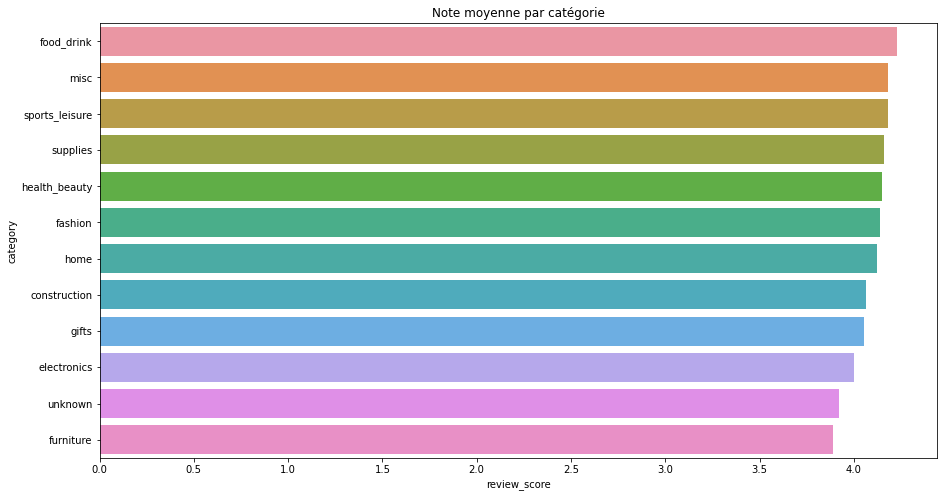

In [126]:
df = histo[['category','review_score']].copy()
df = df.groupby('category').mean().sort_values(by=['review_score'],ascending=False)

plt.figure(figsize = (15,8))
plt.title('Note moyenne par catégorie')
sns.barplot(y=df.index, x='review_score', data=df)
plt.savefig('resultats/stats_'+'-'.join(df.columns)+'.png',bbox_inches='tight')
plt.show()

Statistique des affluences

<Figure size 1080x360 with 0 Axes>

Text(0.5, 1.0, 'Distribution de day_name')

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

<AxesSubplot:title={'center':'Distribution de day_name'}, xlabel='day_name', ylabel='count'>

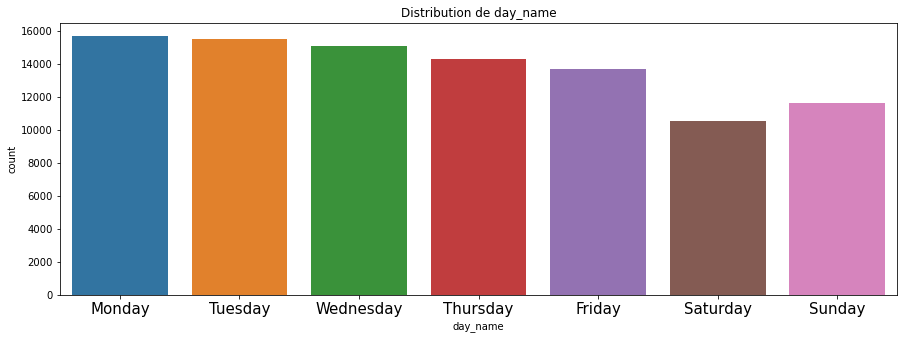

<Figure size 1080x360 with 0 Axes>

Text(0.5, 1.0, 'Distribution de hour')

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

<AxesSubplot:title={'center':'Distribution de hour'}, xlabel='hour', ylabel='count'>

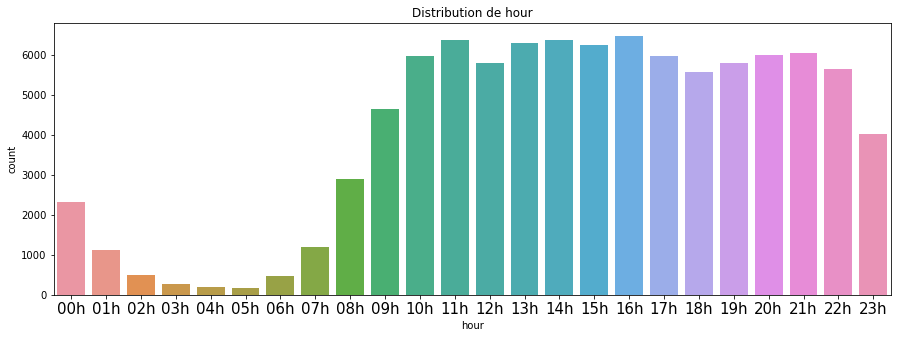

In [127]:
df = histo[['order_id','order_purchase_timestamp']].drop_duplicates().copy()

df['day_name']=pd.to_datetime(df.order_purchase_timestamp).dt.day_name()
df['hour'] = df['order_purchase_timestamp'].dt.hour
df.drop(columns = ['order_id','order_purchase_timestamp'], inplace = True)

def affichage(hour_str):
    if len(hour_str) == 1:
        return '0' + hour_str + 'h'
    return hour_str + 'h'

df.hour = df.hour.astype(str)
df.hour = df.hour.apply(lambda hour_str: affichage(hour_str))

ords = [['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],
          ['00h','01h','02h','03h','04h','05h','06h','07h','08h','09h','10h','11h',
           '12h','13h','14h','15h','16h','17h','18h','19h','20h','21h','22h','23h']]

for col,order in zip(df.columns,ords):
    plt.figure(figsize = (15,5))
    plt.title('Distribution de ' + col)
    plt.xticks(fontsize = 15)
    sns.countplot(data = df, x = col, order = order)
    plt.savefig('resultats/stats_'+col+'.png',bbox_inches='tight')
    plt.show()

Statistique des prix

<Figure size 1080x360 with 0 Axes>

Text(0.5, 1.0, 'Distribution des achats')

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

<AxesSubplot:title={'center':'Distribution des achats'}, xlabel='price', ylabel='count'>

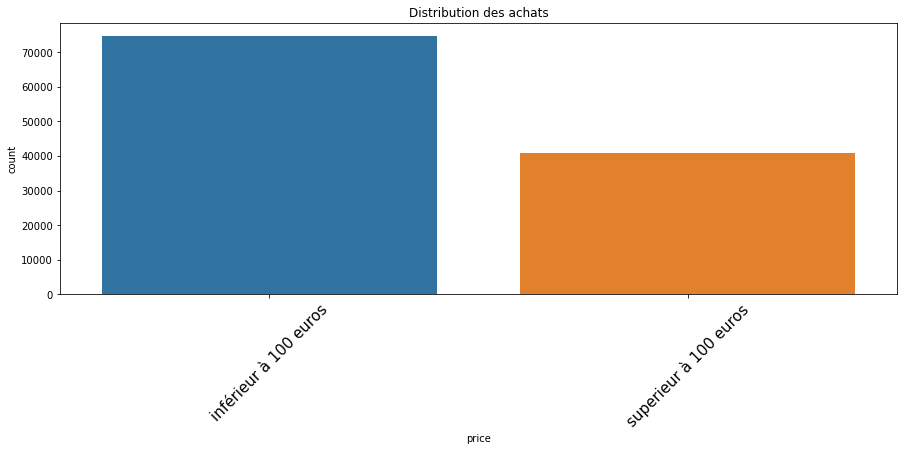

In [128]:
df = histo[['order_id','price']].copy()
df.price = df.price.astype(int)

def tranche(price):
    if price <= 100:
        return 'inférieur à 100 euros'
    return 'superieur à 100 euros'

df.price = df.price.apply(lambda price: tranche(price))
ords = ['inférieur à 100 euros','superieur à 100 euros']

plt.figure(figsize = (15,5))
plt.title('Distribution des achats')
plt.xticks(rotation = 45, fontsize = 15)
sns.countplot(data = df, x = 'price', order = ords)
plt.savefig('resultats/stats_'+'-'.join(df.columns)+'.png',bbox_inches='tight')
plt.show()

Statistique des types de paiement

<Figure size 1080x360 with 0 Axes>

Text(0.5, 1.0, 'Distribution des types de paiement')

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

<AxesSubplot:title={'center':'Distribution des types de paiement'}, xlabel='payment_type', ylabel='count'>

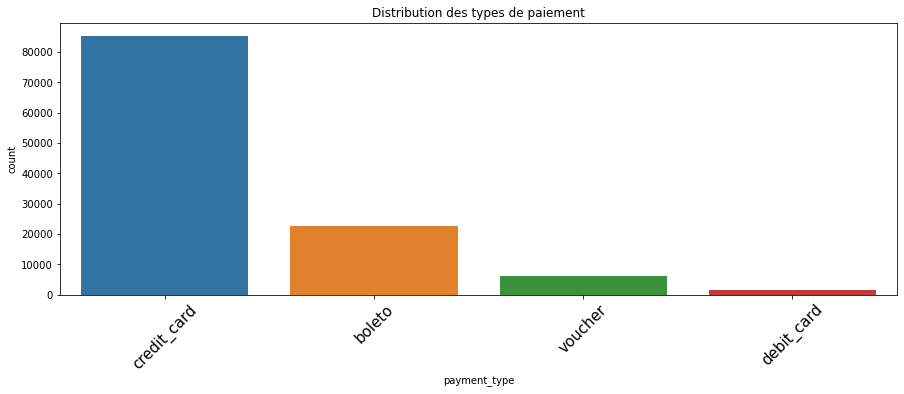

In [129]:
df = histo[['payment_type']].copy()

plt.figure(figsize = (15,5))
plt.title('Distribution des types de paiement')
plt.xticks(rotation = 45, fontsize = 15)
sns.countplot(data = df, x = 'payment_type')
plt.savefig('resultats/stats_'+'-'.join(df.columns)+'.png',bbox_inches='tight')
plt.show()

Statistique des provenances 

<Figure size 1080x360 with 0 Axes>

Text(0.5, 1.0, 'Distribution des états')

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

<AxesSubplot:title={'center':'Distribution des états'}, xlabel='customer_state', ylabel='count'>

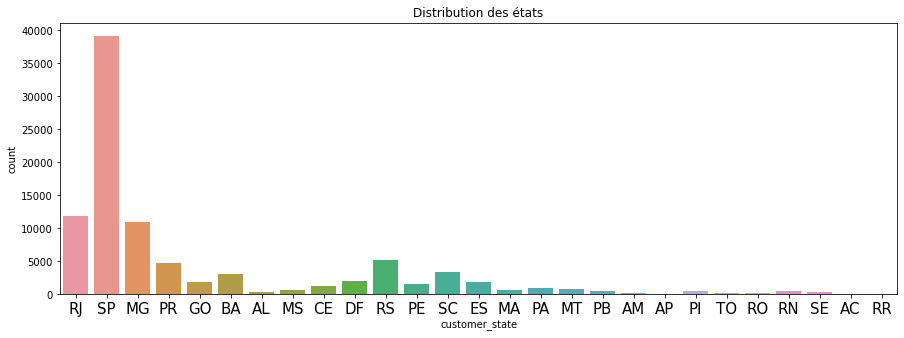

In [130]:
df = histo[['customer_id','customer_state']].drop_duplicates().copy()

plt.figure(figsize = (15,5))
plt.title('Distribution des états')
plt.xticks(fontsize = 15)
sns.countplot(data = df, x = 'customer_state')
plt.savefig('resultats/stats_'+'-'.join(df.columns)+'.png',bbox_inches='tight')
plt.show()

Statistique des échelons paiement

<Figure size 1080x360 with 0 Axes>

Text(0.5, 1.0, "Distribution des paiements selon le nombre d'échelons")

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

<AxesSubplot:title={'center':"Distribution des paiements selon le nombre d'échelons"}, xlabel='payment_installments', ylabel='count'>

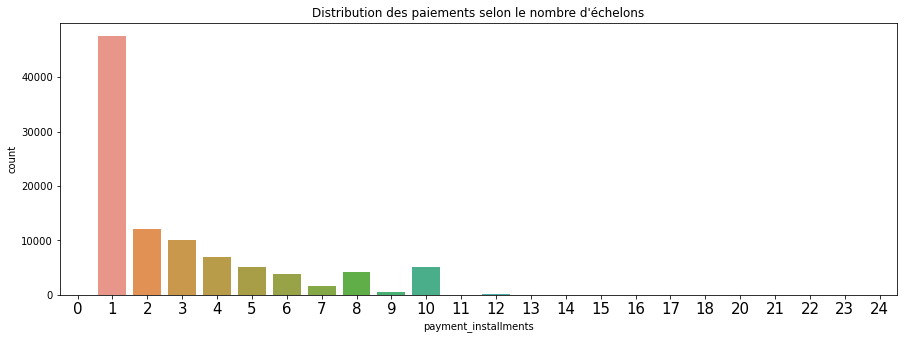

In [132]:
df = histo[['order_id','payment_installments']].drop_duplicates().copy()
df.payment_installments = df.payment_installments.astype(int)

plt.figure(figsize = (15,5))
plt.title('Distribution des paiements selon le nombre d\'échelons')
plt.xticks(fontsize = 15)
sns.countplot(data = df, x = 'payment_installments')
plt.savefig('resultats/stats_'+'-'.join(df.columns)+'.png',bbox_inches='tight')
plt.show()

# Dataset pour le clustering

In [1080]:
colonnes = ['customer_id','order_id','payment_installments',
           'customer_state','hour','day_name','payment_type',
           'CA_ligne','category']

In [1095]:
df_clustering = histo[['customer_id','order_id','hour','day_name',
                       'category','CA_ligne','review_score',
                       'order_purchase_timestamp']].copy()
df_clustering.rename(columns = {'CA_ligne':'payment_value'}, inplace = True)
agg_cols = {
    'order_purchase_timestamp' : 'first',
    'hour' : 'first',
    'day_name' : 'first',
    'category' : 'first',
    'review_score' : 'first',
    'payment_value' : 'sum'
}

df_clustering = df_clustering.groupby(['customer_id','order_id'], as_index = False).agg(agg_cols)
df_clustering.drop(columns = ['order_id'], inplace = True)

date_debut = df_clustering.order_purchase_timestamp.min()
df_clustering['months_interval'] = df_clustering.order_purchase_timestamp.apply(lambda date: 12 * relativedelta(date,date_debut).years + relativedelta(date,date_debut).months)

def get_week_period(day):
    if day in {'Saturday','Sunday'}:
        return 'week-end'
    return 'week'

def get_recence(period):
    if period < 3:
        return 'last 3 months'
    if period < 6:
        return 'last 6 months'
    if period < 12:
        return 'last year'
    return 'last 2 years'

df_clustering['week_period'] = df_clustering.day_name.apply(lambda day: get_week_period(day))
df_clustering['recence'] = df_clustering.months_interval.apply(lambda period: get_recence(period))

df_clustering.to_csv('data_clustering.csv', index = False)

In [1096]:
df_clustering

,customer_id,order_purchase_timestamp,hour,day_name,category,review_score,payment_value,months_interval,week_period,recence
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,10,Thursday,furniture,5,141.90,19,week,last 2 years
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,11,Monday,health_beauty,4,27.19,19,week,last 2 years
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,21,Friday,supplies,3,86.22,5,week,last 6 months
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,20,Thursday,electronics,4,43.62,12,week,last 2 years
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,19,Tuesday,electronics,5,196.89,13,week,last 2 years
...,...,...,...,...,...,...,...,...,...,...
96463,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-08 21:00:36,21,Thursday,health_beauty,5,2067.42,8,week,last year
96464,fffea47cd6d3cc0a88bd621562a9d061,2017-12-10 20:07:56,20,Sunday,health_beauty,4,84.58,14,week-end,last 2 years
96465,ffff371b4d645b6ecea244b27531430a,2017-02-07 15:49:16,15,Tuesday,supplies,5,112.46,4,week,last 6 months
96466,ffff5962728ec6157033ef9805bacc48,2018-05-02 15:17:41,15,Wednesday,gifts,5,133.69,18,week,last 2 years
